# ImmoEliza Project - Part 3: Regression 

# Step 2: Feature Engineering

In [1]:
# Import cleaned & encoded data

import pandas as pd

df_encoded = pd.read_csv("./data/1_cleaned_data.csv")

In [2]:
df_encoded.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface'],
      dtype='object')

In [3]:
# Checking data types
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26102 entries, 0 to 26101
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_code             26102 non-null  int64  
 1   commune              26102 non-null  object 
 2   province             26102 non-null  object 
 3   type_of_property     26102 non-null  int64  
 4   subtype_of_property  26102 non-null  int64  
 5   price                26102 non-null  float64
 6   building_condition   26102 non-null  int64  
 7   facade_number        26102 non-null  int64  
 8   living_area          26102 non-null  int64  
 9   equipped_kitchen     26102 non-null  int64  
 10  bedroom_nr           26102 non-null  int64  
 11  swimming_pool        26102 non-null  int64  
 12  furnished            26102 non-null  int64  
 13  open_fire            26102 non-null  int64  
 14  terrace              26102 non-null  int64  
 15  garden               26102 non-null 

### Checking Data Distribution

C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\412983406.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_encoded.hist(ax=ax)


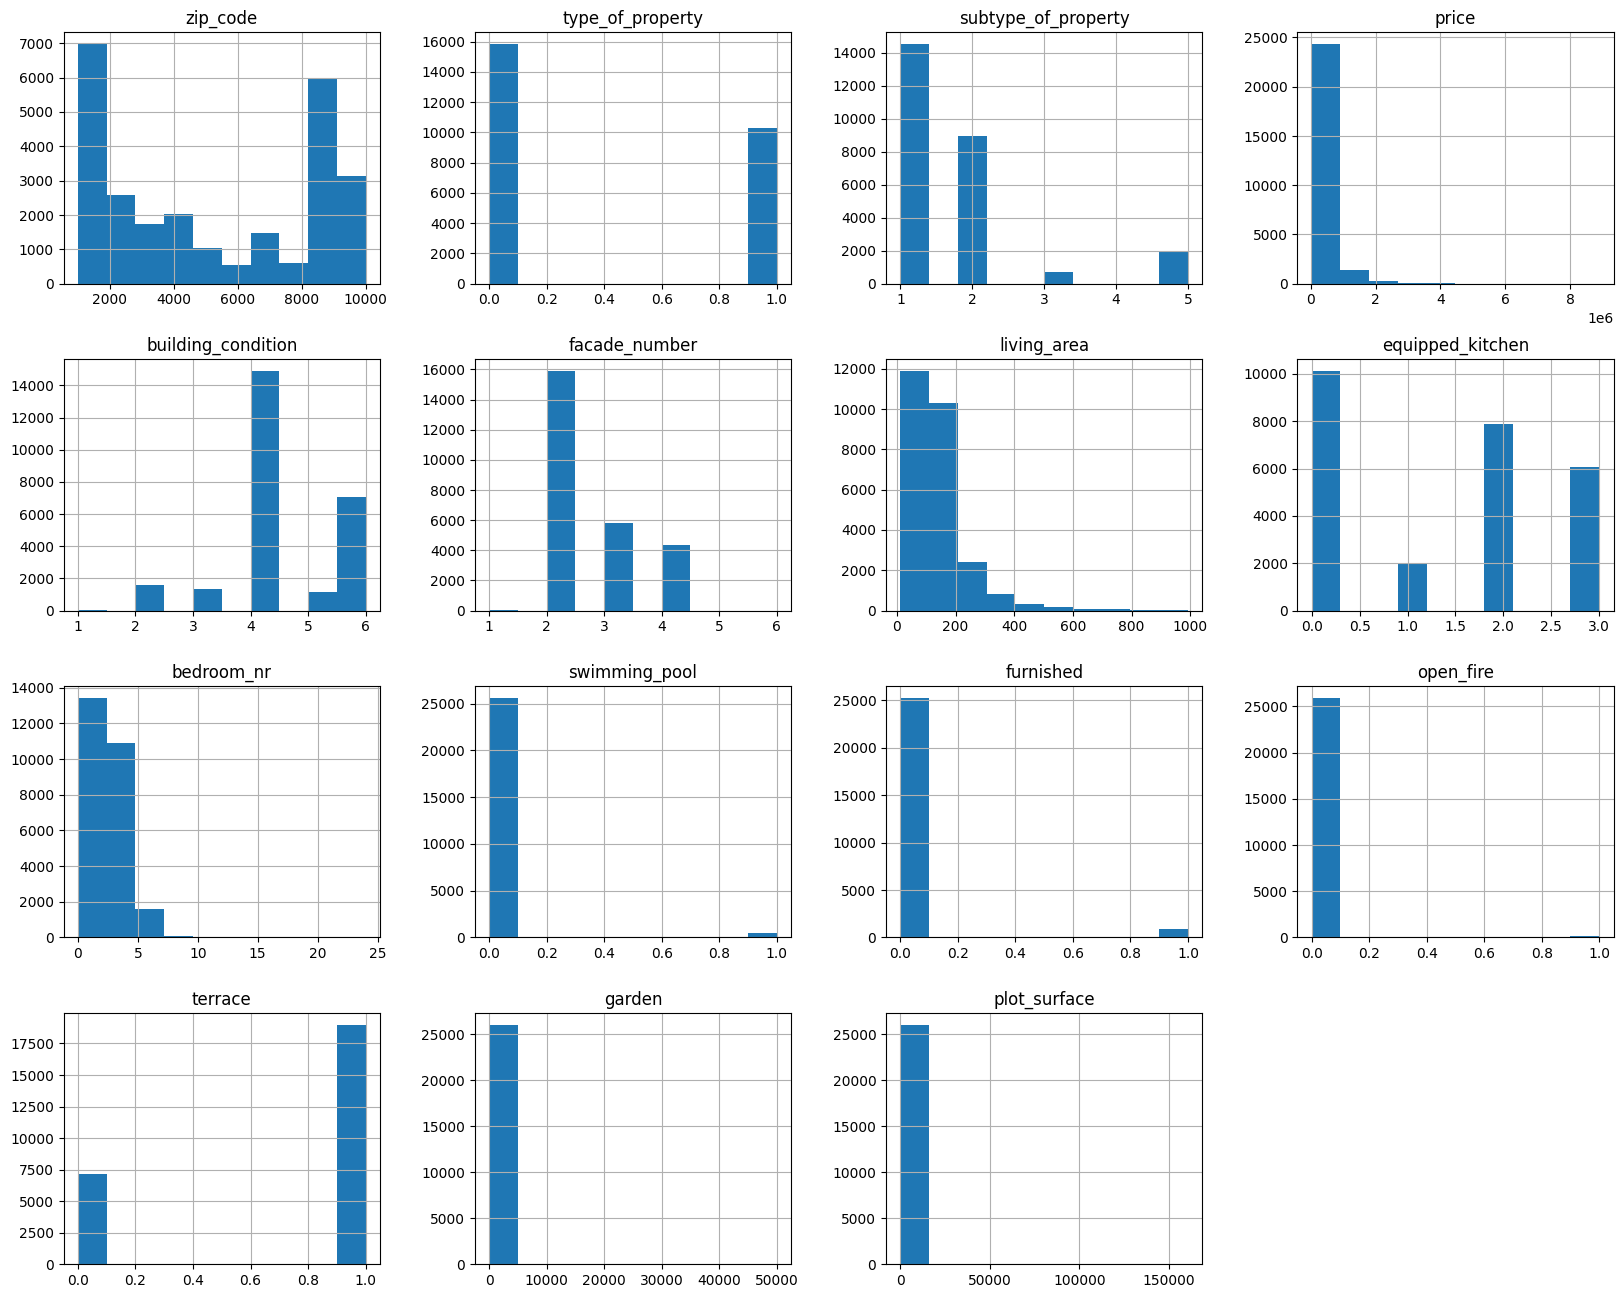

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 16))
ax = fig.gca()
df_encoded.hist(ax=ax)
plt.show()

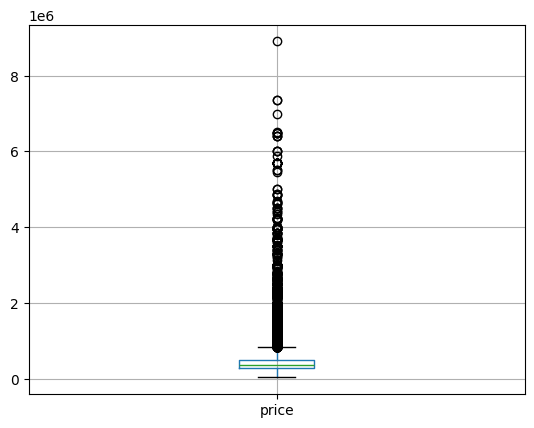

In [5]:
df_encoded[["price"]].boxplot()
plt.show()

In [6]:
df_encoded.describe().round(0)

,zip_code,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface
count,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0
mean,5083.0,0.0,2.0,459060.0,4.0,3.0,144.0,1.0,3.0,0.0,0.0,0.0,1.0,101.0,405.0
std,3284.0,0.0,1.0,434678.0,1.0,1.0,97.0,1.0,1.0,0.0,0.0,0.0,0.0,654.0,2644.0
min,1000.0,0.0,1.0,27500.0,1.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1740.0,0.0,1.0,265000.0,4.0,2.0,88.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4470.0,0.0,1.0,350000.0,4.0,2.0,116.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,8460.0,1.0,2.0,491400.0,6.0,3.0,170.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,254.0
max,9992.0,1.0,5.0,8900000.0,6.0,6.0,992.0,3.0,24.0,1.0,1.0,1.0,1.0,50000.0,160737.0


### Calculating price per sqm

Will rely on living area, since more common and since many properties do not have an additional plot and since plot surface sometimes includes garden, sometimes does not.

In [7]:
# Add price per sqm (total surface)
df_encoded["price_per_m²_ts"] = (
    df_encoded["price"] / (df_encoded["living_area"] + df_encoded["plot_surface"])
).round(2)

In [8]:
# Add price per sqm (living area)
df_encoded["price_per_m²_la"] = (df_encoded["price"] / df_encoded["living_area"]).round(
    2
)

### Get Coordinates for Communes

In [9]:
# Update the commune name for the specific rows
df_encoded.loc[19712, "commune"] = "Petit-Rœulx-lez-Nivelles"
df_encoded.loc[22750, "commune"] = "Petit-Rœulx-lez-Nivelles"

# Verify the changes
df_encoded.loc[[19712, 22750], "commune"]

19712    Petit-Rœulx-lez-Nivelles
22750    Petit-Rœulx-lez-Nivelles
Name: commune, dtype: object

In [10]:
"""from geopy.geocoders import Nominatim
import pandas as pd

# Get list of unique communes
communes = df_encoded['commune'].unique()

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapi")

# Get latitude and longitude
def get_lat_lon(commune):
    location = geolocator.geocode(commune + ", Belgium")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create a DataFrame with unique communes and their lat/lon
commune_lat_lon = pd.DataFrame(communes, columns=['commune'])
commune_lat_lon[['latitude', 'longitude']] = commune_lat_lon['commune'].apply(get_lat_lon).apply(pd.Series)

# Map the latitude and longitude to the original df_encoded
df_encoded = df_encoded.merge(commune_lat_lon, on='commune', how='left')"""

'from geopy.geocoders import Nominatim\nimport pandas as pd\n\n# Get list of unique communes\ncommunes = df_encoded[\'commune\'].unique()\n\n# Initialize geocoder\ngeolocator = Nominatim(user_agent="geoapi")\n\n# Get latitude and longitude\ndef get_lat_lon(commune):\n    location = geolocator.geocode(commune + ", Belgium")\n    if location:\n        return location.latitude, location.longitude\n    else:\n        return None, None\n\n# Create a DataFrame with unique communes and their lat/lon\ncommune_lat_lon = pd.DataFrame(communes, columns=[\'commune\'])\ncommune_lat_lon[[\'latitude\', \'longitude\']] = commune_lat_lon[\'commune\'].apply(get_lat_lon).apply(pd.Series)\n\n# Map the latitude and longitude to the original df_encoded\ndf_encoded = df_encoded.merge(commune_lat_lon, on=\'commune\', how=\'left\')'

In [11]:
df_encoded.isna().sum()

zip_code               0
commune                0
province               0
type_of_property       0
subtype_of_property    0
price                  0
building_condition     0
facade_number          0
living_area            0
equipped_kitchen       0
bedroom_nr             0
swimming_pool          0
furnished              0
open_fire              0
terrace                0
garden                 0
plot_surface           0
price_per_m²_ts        0
price_per_m²_la        0
dtype: int64

In [12]:
# Check the result
df_encoded.head()

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,price_per_m²_ts,price_per_m²_la
0,2600,Berchem,Antwerpen,0,1,149000.0,4,2,48,2,1,0,0,0,1,0,0,3104.17,3104.17
1,2100,Deurne,Antwerpen,0,1,248000.0,4,2,91,2,3,0,0,0,1,0,0,2725.27,2725.27
2,2660,Hoboken,Antwerpen,0,1,229000.0,6,2,100,0,3,0,0,0,1,0,0,2290.00,2290.00
3,1180,Uccle,Bruxelles,0,1,470000.0,4,2,179,3,3,0,0,0,1,0,0,2625.70,2625.70
4,2018,Antwerpen,Antwerpen,0,1,480000.0,5,2,116,2,2,0,0,0,1,0,0,4137.93,4137.93


In [13]:
"""import folium

# Initialize map centered on Belgium
belgium_map = folium.Map(location=[50.8503, 4.3517], zoom_start=8)  # Centered roughly on Brussels

# Add points to the map
for _, row in df_encoded.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=1,  # Small marker size
            color="blue",
            fill=True,
            fill_opacity=0.5
        ).add_to(belgium_map)

# Show the map
belgium_map.save("belgium_map.html")
belgium_map"""

'import folium\n\n# Initialize map centered on Belgium\nbelgium_map = folium.Map(location=[50.8503, 4.3517], zoom_start=8)  # Centered roughly on Brussels\n\n# Add points to the map\nfor _, row in df_encoded.iterrows():\n    if pd.notnull(row[\'latitude\']) and pd.notnull(row[\'longitude\']):\n        folium.CircleMarker(\n            location=[row[\'latitude\'], row[\'longitude\']],\n            radius=1,  # Small marker size\n            color="blue",\n            fill=True,\n            fill_opacity=0.5\n        ).add_to(belgium_map)\n\n# Show the map\nbelgium_map.save("belgium_map.html")\nbelgium_map'

### Clustering

In [16]:
# Import Libraries

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_filtered.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface',
       'price_per_m²_ts', 'price_per_m²_la'],
      dtype='object')

In [ ]:
"""
X = df_filtered[['latitude', 'longitude', 'price_per_m²_la']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)"""

"# Assuming your DataFrame is called df with columns 'latitude', 'longitude', and 'price'\nX = df_filtered[['latitude', 'longitude', 'price_per_m²_la']]\n\n# Standardizing the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)"

In [19]:
"""# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.3, min_samples=5)
df_filtered.loc[:,'location_cluster'] = dbscan.fit_predict(X_scaled)

# Check the resulting clusters
df_filtered[['latitude', 'longitude', 'price_per_m²_la', 'location_cluster']].head()"""

"# Apply DBSCAN with chosen parameters\ndbscan = DBSCAN(eps=0.3, min_samples=5)\ndf_filtered.loc[:,'location_cluster'] = dbscan.fit_predict(X_scaled)\n\n# Check the resulting clusters\ndf_filtered[['latitude', 'longitude', 'price_per_m²_la', 'location_cluster']].head()"

In [20]:
"""# Step 1: Calculate the mean price for each cluster
cluster_price_means = df_filtered.groupby('location_cluster')['price_per_m²_la'].mean()

# Step 2: Sort the clusters by mean price in descending order
sorted_clusters = cluster_price_means.sort_values(ascending=True)

# Step 3: Create a mapping of old labels to new labels based on sorted price
label_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters.index)}

# Step 4: Apply the new labels to the 'location_cluster' column
df_filtered['location_cluster_sorted'] = df_filtered['location_cluster'].map(label_mapping)

# Check the new cluster labels
df_filtered[['location_cluster', 'location_cluster_sorted', 'price']].head()"""

"# Step 1: Calculate the mean price for each cluster\ncluster_price_means = df_filtered.groupby('location_cluster')['price_per_m²_la'].mean()\n\n# Step 2: Sort the clusters by mean price in descending order\nsorted_clusters = cluster_price_means.sort_values(ascending=True)\n\n# Step 3: Create a mapping of old labels to new labels based on sorted price\nlabel_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters.index)}\n\n# Step 4: Apply the new labels to the 'location_cluster' column\ndf_filtered['location_cluster_sorted'] = df_filtered['location_cluster'].map(label_mapping)\n\n# Check the new cluster labels\ndf_filtered[['location_cluster', 'location_cluster_sorted', 'price']].head()"

In [21]:
"""# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['longitude'], df_encoded['latitude'], c=df_encoded['location_cluster_sorted'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real Estate Price Clusters by Location')
plt.show()"""

"# Plot the clusters\nplt.figure(figsize=(10, 6))\nplt.scatter(df_encoded['longitude'], df_encoded['latitude'], c=df_encoded['location_cluster_sorted'], cmap='viridis', alpha=0.6)\nplt.colorbar(label='Cluster')\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\nplt.title('Real Estate Price Clusters by Location')\nplt.show()"

In [22]:
"""from sklearn.neighbors import NearestNeighbors

# Calculate the k-distances for each point
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot the k-distance graph to find the optimal eps
plt.plot(np.sort(distances[:, 9]))  # 10th nearest neighbor distance (min_samples = 10)
plt.xlabel('Data Points')
plt.ylabel('Distance to 10th Nearest Neighbor')
plt.title('K-distance Plot')
plt.show()"""

"from sklearn.neighbors import NearestNeighbors\n\n# Calculate the k-distances for each point\nneighbors = NearestNeighbors(n_neighbors=10)\nneighbors_fit = neighbors.fit(X_scaled)\ndistances, indices = neighbors_fit.kneighbors(X_scaled)\n\n# Plot the k-distance graph to find the optimal eps\nplt.plot(np.sort(distances[:, 9]))  # 10th nearest neighbor distance (min_samples = 10)\nplt.xlabel('Data Points')\nplt.ylabel('Distance to 10th Nearest Neighbor')\nplt.title('K-distance Plot')\nplt.show()"

In [23]:
"""# Group by the 'location_cluster' and calculate the mean price for each cluster
cluster_price_means = df_filtered.groupby('location_cluster_sorted')['price_per_m²_la'].mean().round(2)
cluster_price_means"""

"# Group by the 'location_cluster' and calculate the mean price for each cluster\ncluster_price_means = df_filtered.groupby('location_cluster_sorted')['price_per_m²_la'].mean().round(2)\ncluster_price_means"

### Label Encoding of provinces based on average price per sqm

In [24]:
# Calculating average price per sqm per province
province_avg_price = df_filtered.groupby("province")["price_per_m²_la"].mean()

# Sort provinces by average price per sqm in descending order
sorted_provinces = province_avg_price.sort_values(ascending=False)

# Create a mapping for label encoding
province_label_mapping = {
    province: label
    for label, province in enumerate(sorted_provinces.index[::-1], start=1)
}

# Apply mapping to the 'province' column
df_filtered.loc[:, "province_encoded"] = df_filtered["province"].map(
    province_label_mapping
)

# Check the result
df_filtered[["province", "province_encoded", "price", "price_per_m²_la"]].head()

C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\2742761273.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'province_encoded'] = df_filtered['province'].map(province_label_mapping)


,province,province_encoded,price,price_per_m²_la
0,Antwerpen,8,149000.0,3104.17
1,Antwerpen,8,248000.0,2725.27
2,Antwerpen,8,229000.0,2290.00
3,Bruxelles,11,470000.0,2625.70
4,Antwerpen,8,480000.0,4137.93


### Label Encoding of Municipalities based on average price per sqm

In [25]:
# Calculate average price per sqm for each municipality
commune_avg_price = df_filtered.groupby("commune")["price_per_m²_la"].mean()

# Sort municipalities by average price per sqm in descending order
sorted_communes = commune_avg_price.sort_values(ascending=False)

# Reverse the sorting order so the highest price gets the highest label
commune_label_mapping = {
    comm: label for label, comm in enumerate(sorted_communes.index[::-1], start=1)
}

# Step 5: Apply the mapping to the 'municipality' column
df_filtered.loc[:, "commune_encoded"] = df_filtered["commune"].map(
    commune_label_mapping
)

# Check the result
df_filtered.loc[:, ["commune", "commune_encoded", "price", "price_per_m²_la"]].head()

C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\4157456333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'commune_encoded'] = df_filtered['commune'].map(commune_label_mapping)


,commune,commune_encoded,price,price_per_m²_la
0,Berchem,704,149000.0,3104.17
1,Deurne,580,248000.0,2725.27
2,Hoboken,498,229000.0,2290.00
3,Uccle,848,470000.0,2625.70
4,Antwerpen,835,480000.0,4137.93


In [26]:
# Check that the correct communes are getting the expected labels
commune_avg_price.sort_values(ascending=False).head()

commune
Westkapelle    8596.726777
Ramskapelle    6646.576283
Leuven         6261.850838
Auderghem      5746.051100
Wulpen         5481.983457
Name: price_per_m²_la, dtype: float64

In [27]:
df_filtered[["commune", "commune_encoded"]].drop_duplicates().sort_values(
    "commune_encoded", ascending=False
).head()

,commune,commune_encoded
49,Westkapelle,860
482,Ramskapelle,859
68,Leuven,858
71,Auderghem,857
337,Wulpen,856


### Feature Combinations

In [ ]:
df_filtered["living_area_building_condition"] = (
    df_filtered["living_area"] * df_filtered["building_condition"]
)

df_filtered["subtype_living_area"] = (
    df_filtered["subtype_of_property"] * df_filtered["living_area"]
)

df_filtered["terrace_garden"] = df_filtered["terrace"] * df_filtered["garden"]

df_filtered["living_area_rooms"] = (
    df_filtered["living_area"] * df_filtered["bedroom_nr"]
)

df_filtered["subtype_rooms"] = (
    df_filtered["subtype_of_property"] * df_filtered["bedroom_nr"]
)

C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\285365430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['living_area_building_condition'] = df_filtered['living_area'] * df_filtered['building_condition']
C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\285365430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subtype_living_area'] = df_filtered['subtype_of_property'] * df_filtered['living_area']
C:\Users\mstoe\AppData\Local\Temp\ipykernel_37532\285365430.py:5: SettingWit

### Check Feature Correlation

In [52]:
# Select only numerical columns (e.g., int and float types)
numerical_df = df_filtered.select_dtypes(include=["number"])

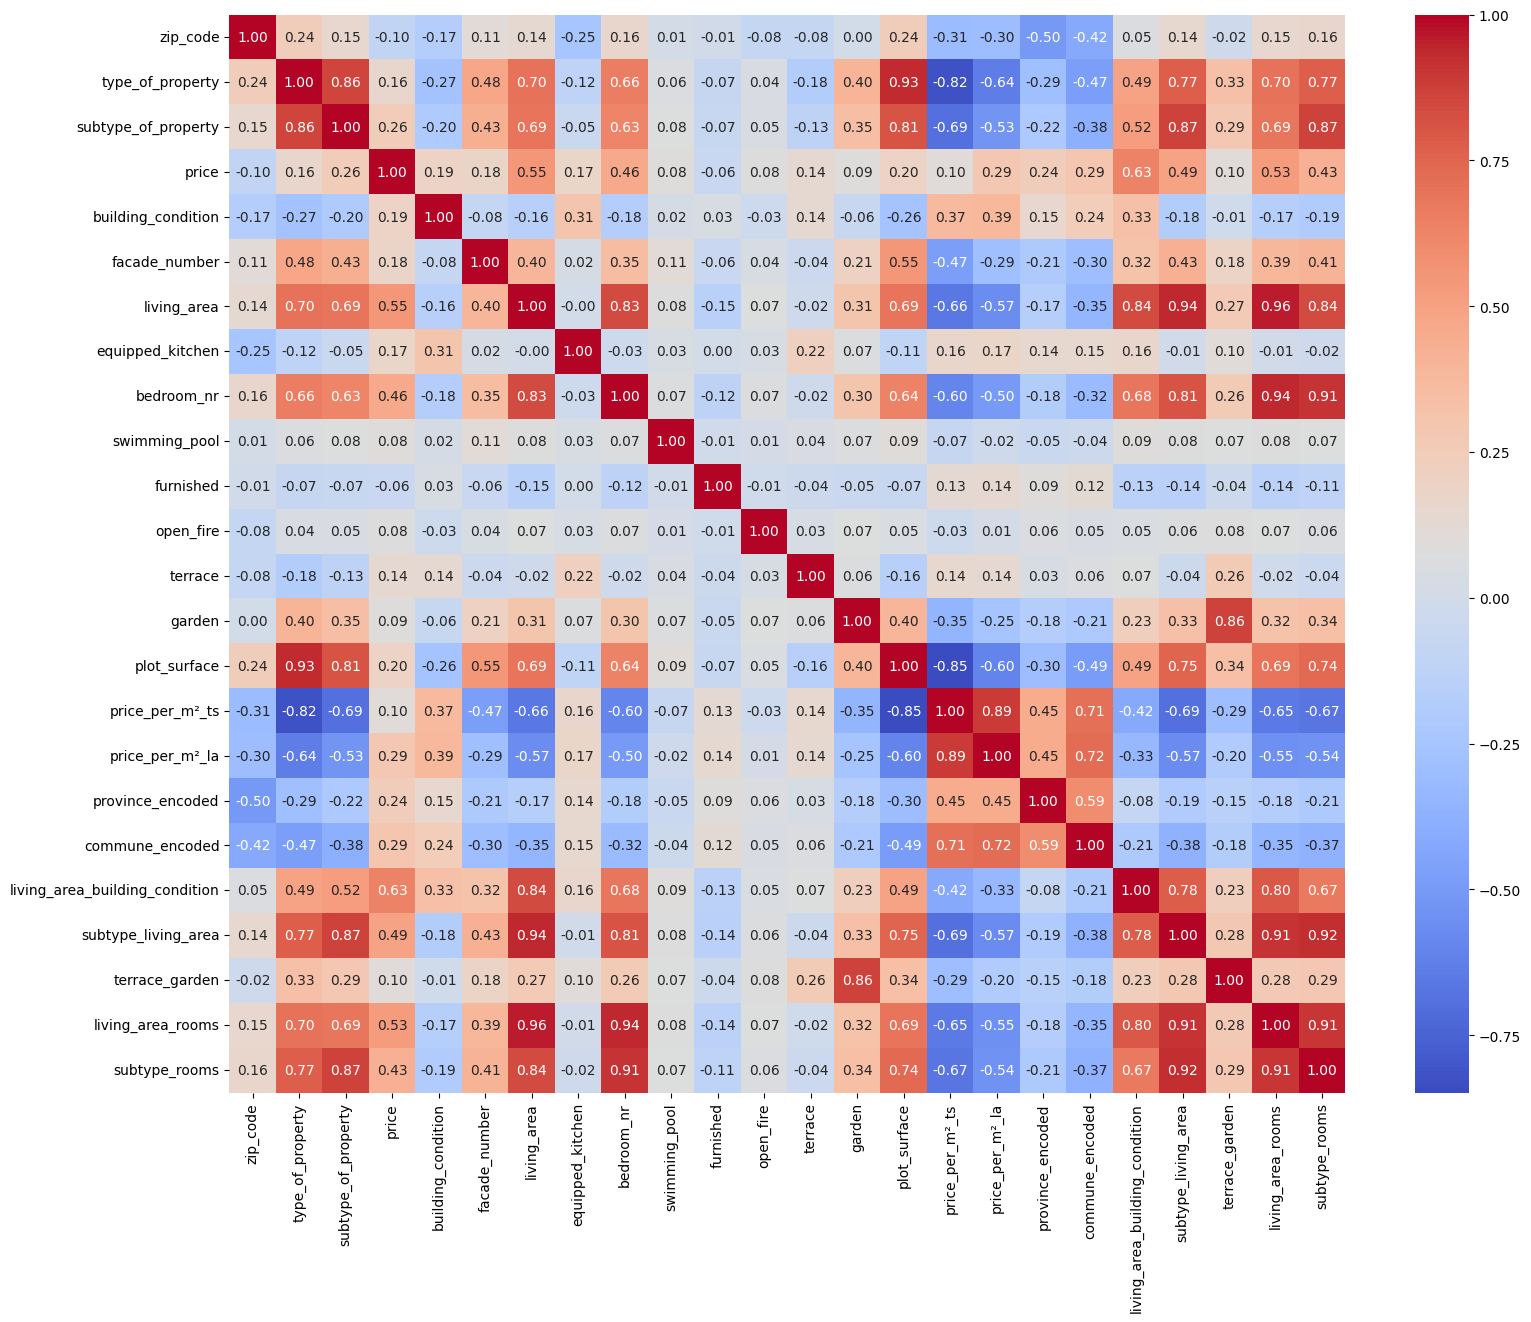

In [53]:
# Compute the Spearman correlation matrix
corr_matrix = numerical_df.corr(method="spearman")

# Display the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to make the heatmap larger
plt.figure(figsize=(18, 14))  # Adjust the size to your preference

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**What threshold should you use to remove correlated features?**

High correlation threshold: A common threshold to remove features with high correlation is 0.8 or 0.9. 

If two features have a correlation above this threshold, one of them can be dropped, as they contain similar information.

**Features to drop due to high correlation:**

* price_per_m²_ts (high negative correlation with subtype)
* plot_surface (high correlation with type and subtype)
* type_of_property (highly correlated with subtype)
* number_of_bedrooms (highly correlated to living_area; living_area is higher correlated with price)
  
**Features with high correlation to target:**
* living area
* price per m² (living area)
* subtype
* location
* building condition

In [44]:
df_filtered.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface',
       'price_per_m²_ts', 'price_per_m²_la', 'province_encoded',
       'commune_encoded', 'living_area_building_condition',
       'subtype_living_area', 'terrace_garden'],
      dtype='object')

### Feature Selection

In [57]:
# List of features to keep
features_to_keep = [
    "price",
    "commune_encoded",
    "living_area",
    "building_condition",
    "terrace",
    "equipped_kitchen",
    "subtype_of_property",
    "garden",
]

df_selected = df_filtered[features_to_keep]

In [58]:
df_selected.columns

Index(['price', 'commune_encoded', 'living_area', 'building_condition',
       'terrace', 'equipped_kitchen', 'subtype_of_property', 'garden'],
      dtype='object')

In [59]:
# Export final dataframe
df_selected.to_csv("./data/2_engineered_data.csv", index=False)